In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)


# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("2.0 df_KNN_imputed.csv")
df.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement         Acceptable  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  \
0  Needs Improvement               Good  Needs Improvement            Poor   
1               Poor  Needs Improvement               Good            Good   
2          Excellent               Good          Excellent       Excellent   
3         Acceptable               Good         Acceptable      Acceptable   
4               Good               Good               Good            Good   

   Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  Female  Loyal Customer  52.0  Business Travel     Business   
1    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  Female  Loyal Customer  43.0  Business Travel     Business   
3  Female  Loyal Customer  44.0  Business Travel     Business   
4  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [5]:
df_number = df.copy()
standard_rating = ['Seat_Comfort',
                   'Arrival_Time_Convenient',
                   'Catering',
                   'Onboard_Wifi_Service',
                   'Onboard_Entertainment',
                   'Online_Support',
                   'Ease_of_Online_Booking',
                   'Onboard_Service',
                   'Legroom',
                   'Baggage_Handling',
                   'CheckIn_Service',
                   'Cleanliness',
                   'Online_Boarding']

for col in standard_rating:
    df_number[col].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                    [5, 4, 3, 2, 1, 0], inplace = True)
df_number['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'], 
                                [5,4,3,2,1,0], inplace = True)

### Function

In [6]:
# Make subplot
def make_scatter(df,data_x,data_y,data_hue):
    fig = plt.figure(figsize=(15,4))  
    ax_1 = fig.add_subplot(131)   
    ax_2 = fig.add_subplot(132) 
    ax_3 = fig.add_subplot(133)
    color_dict = dict({df[data_hue].unique()[0]:'steelblue',df[data_hue].unique()[1]:'darkorange'})

    sns.scatterplot(data = df, y=data_y, x = data_x, hue = data_hue, alpha = 0.1, s=10, palette = color_dict, ax = ax_1)
    sns.scatterplot(data = df, y=df[data_y][df[data_hue] == df[data_hue].unique()[0]], x = df[data_x][df[data_hue] == df[data_hue].unique()[0]],hue = data_hue, alpha = 0.05, s=5, palette = color_dict, ax = ax_2)
    sns.scatterplot(data = df, y=df[data_y][df[data_hue] == df[data_hue].unique()[1]], x = df[data_x][df[data_hue] == df[data_hue].unique()[1]],hue = data_hue, alpha = 0.05, s=5, palette = color_dict, ax = ax_3)


In [7]:
# Make subplot
def make_scatter_2(data_x,data_y,data_hue):
    fig = plt.figure(figsize=(15,4))  
    ax_1 = fig.add_subplot(131)   
    ax_2 = fig.add_subplot(132) 
    ax_3 = fig.add_subplot(133)
    color_dict = dict({data_hue.unique()[0]:'steelblue',data_hue.unique()[1]:'darkorange'})

    sns.scatterplot(data = df, y=data_y, x = data_x, hue = data_hue, alpha = 0.1, s=10, palette = color_dict, ax = ax_1)
    sns.scatterplot(data = df, y=data_y[data_hue == data_hue.unique()[0]], x = data_x[data_hue == data_hue.unique()[0]],hue = data_hue, alpha = 0.05, s=5, palette = color_dict, ax = ax_2)

    sns.scatterplot(data = df, y=data_y[data_hue == data_hue.unique()[1]], x = data_x[data_hue == data_hue.unique()[1]],hue = data_hue, alpha = 0.05, s=5, palette = color_dict, ax = ax_3)

### Scatter Age-Distance 

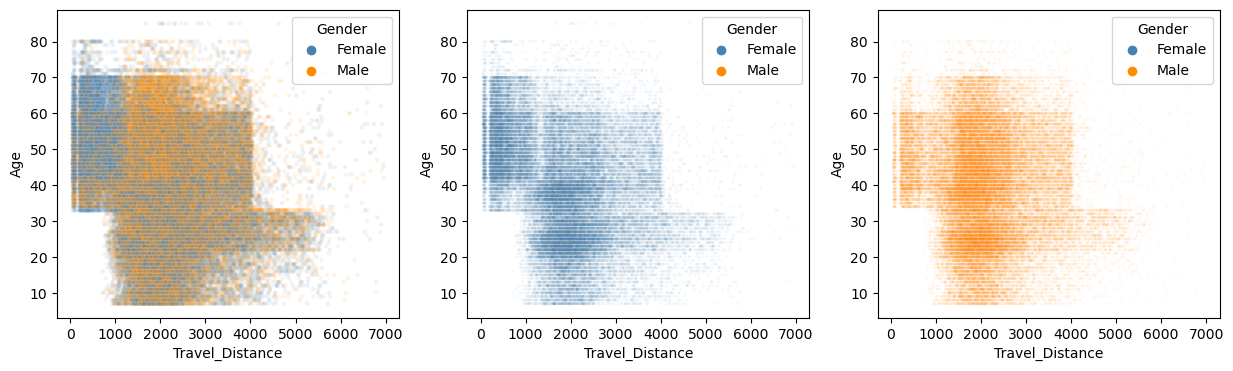

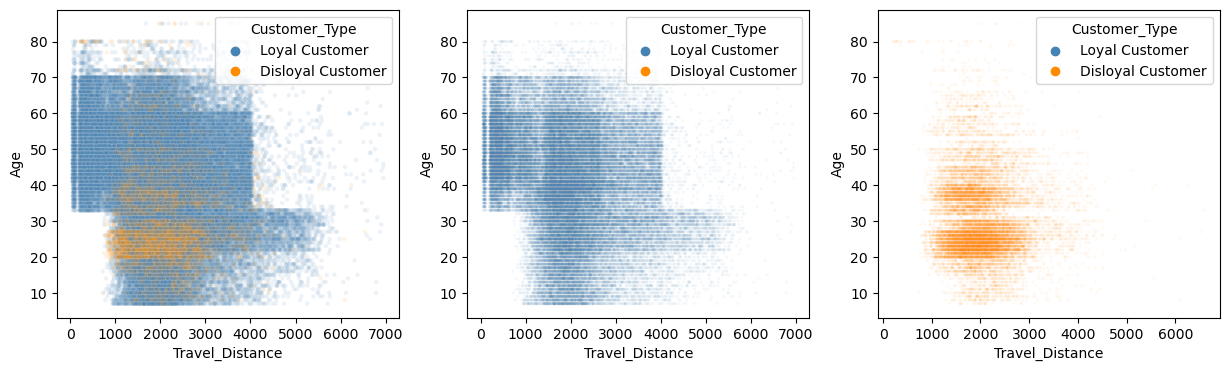

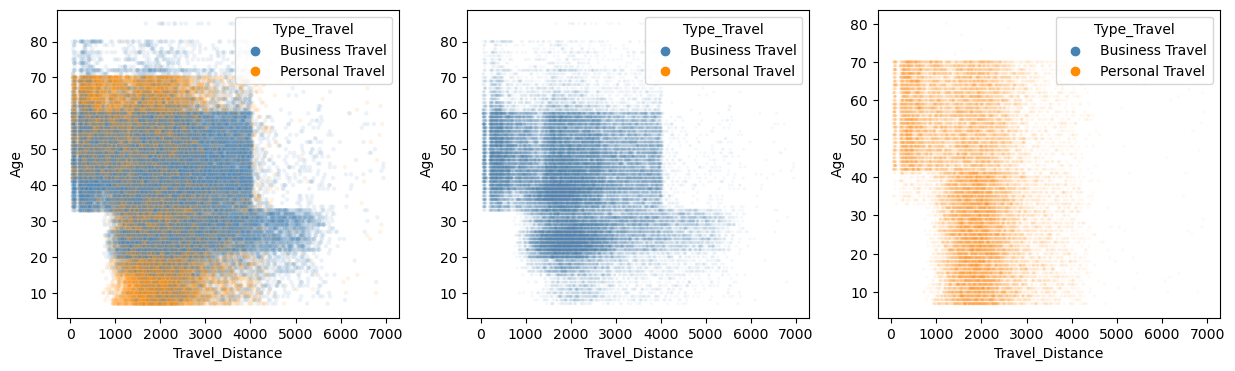

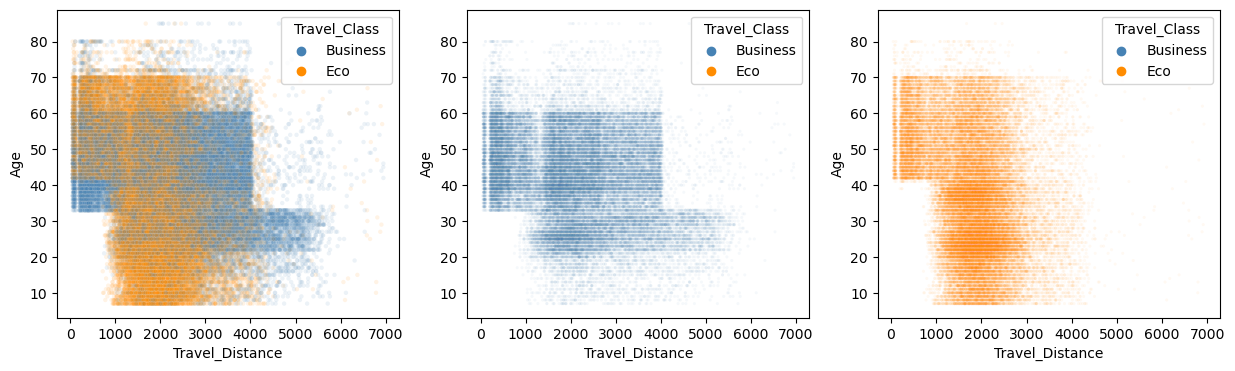

In [8]:
for feature in ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']:
    make_scatter(df,'Travel_Distance','Age',feature)

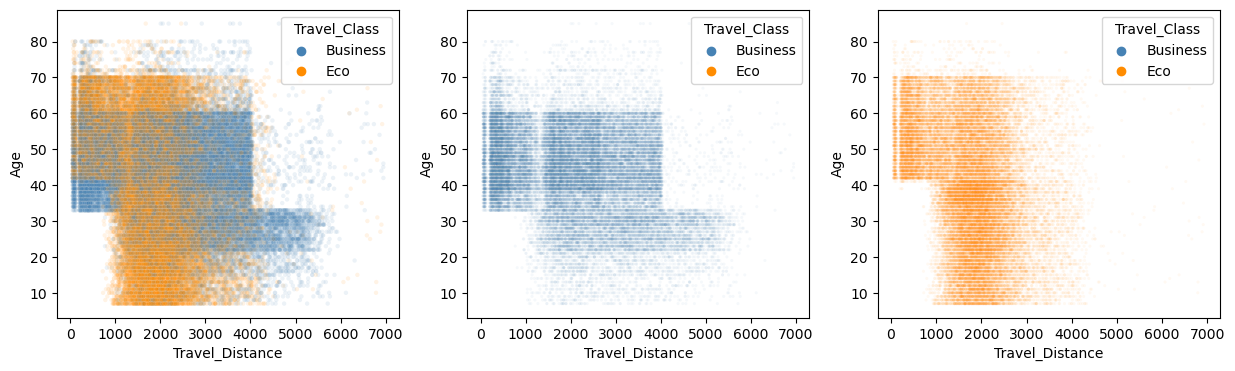

In [9]:
data_x = df['Travel_Distance'][df['Customer_Type'] == 'Loyal Customer']
data_y = df['Age'][df['Customer_Type'] == 'Loyal Customer']
make_scatter_2(data_x, data_y, df['Travel_Class'])

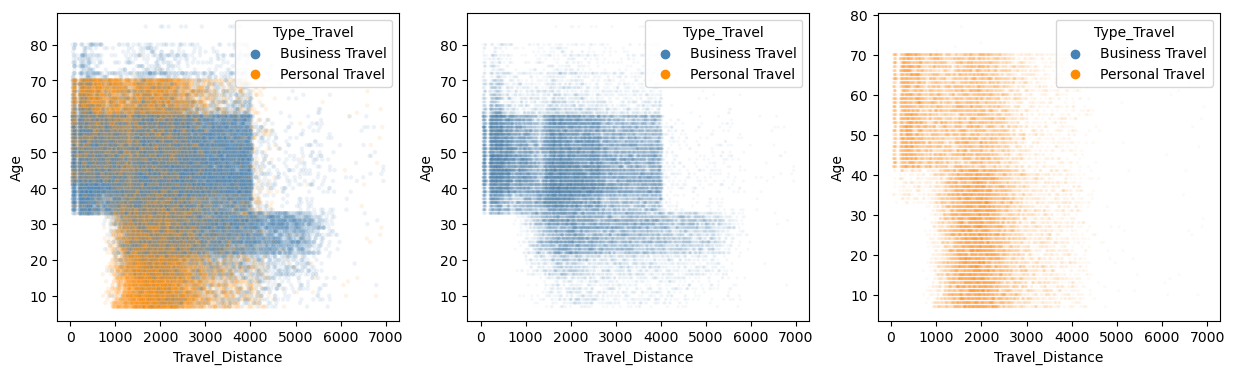

In [10]:
data_x = df['Travel_Distance'][df['Customer_Type'] == 'Loyal Customer']
data_y = df['Age'][df['Customer_Type'] == 'Loyal Customer']
make_scatter_2(data_x, data_y, df['Type_Travel'])

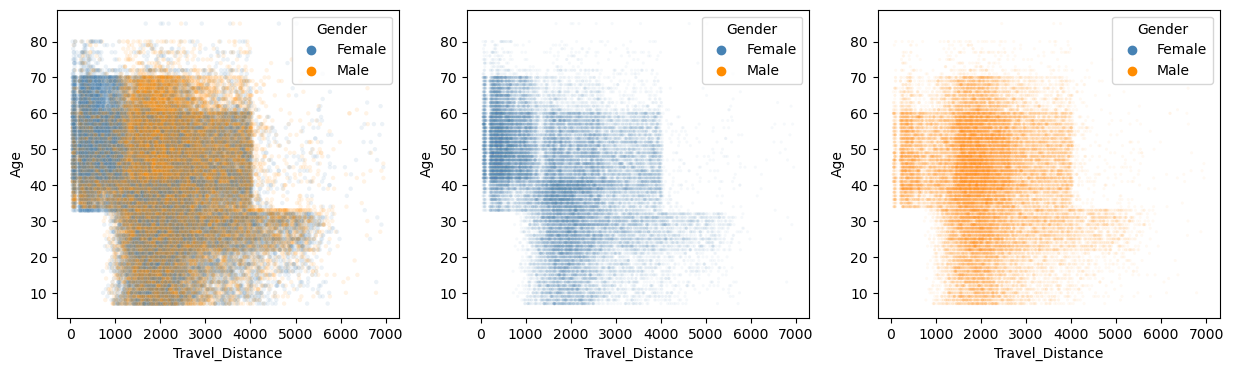

In [11]:
data_x = df['Travel_Distance'][df['Customer_Type'] == 'Loyal Customer']
data_y = df['Age'][df['Customer_Type'] == 'Loyal Customer']
make_scatter_2(data_x, data_y, df['Gender'])

<AxesSubplot: xlabel='Travel_Distance', ylabel='Age'>

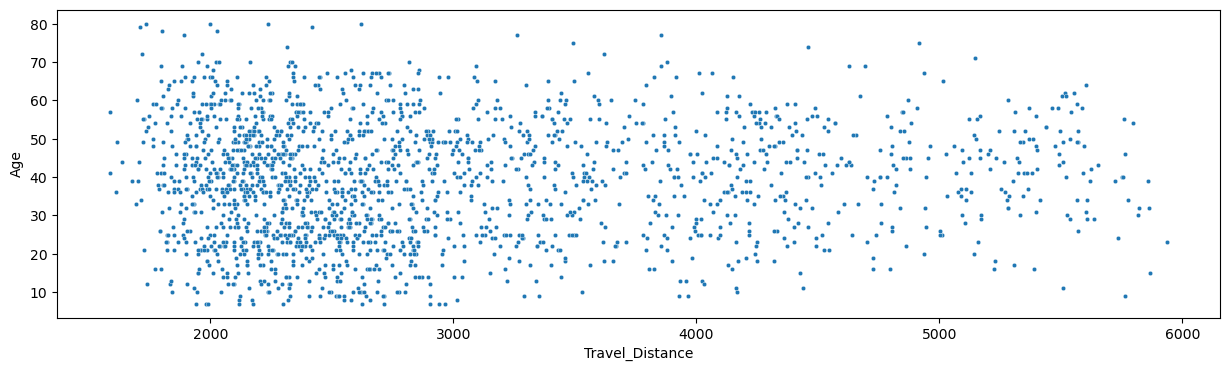

In [12]:
fig = plt.figure(figsize=(15,4))  

where = df['Departure_Delay_in_Mins']>130
data_y = df['Age'][where]
data_x = df['Travel_Distance'][where]
sns.scatterplot(data = df, y=data_y, x = data_x, alpha = 1, s=10,)


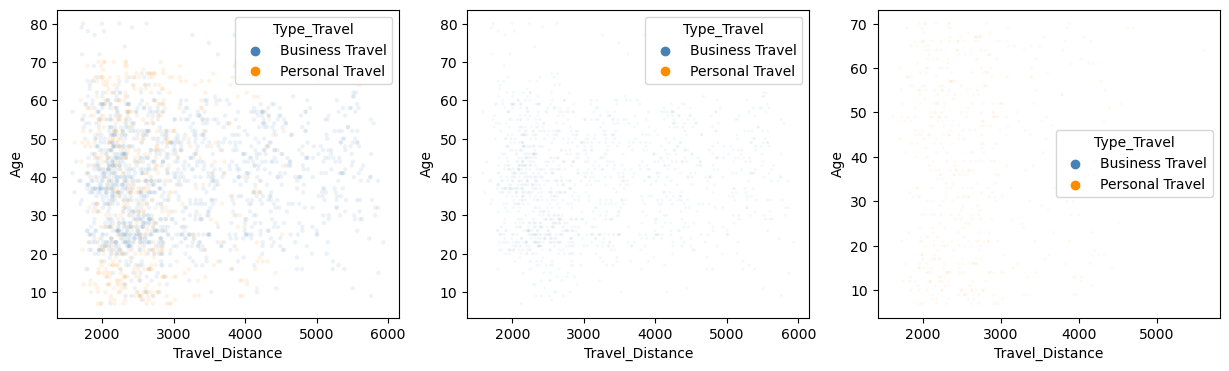

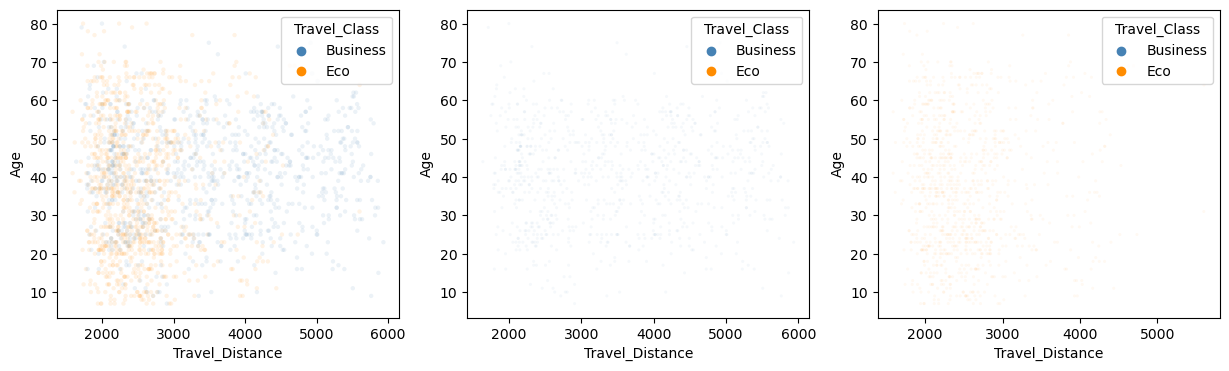

In [13]:
where = df['Departure_Delay_in_Mins']  > 130
data_x = df['Travel_Distance'][where]
data_y = df['Age'][where]
for feature in [df['Type_Travel'], df['Travel_Class']]:
    make_scatter_2(data_x, data_y, feature)

(0.0, 100.0)

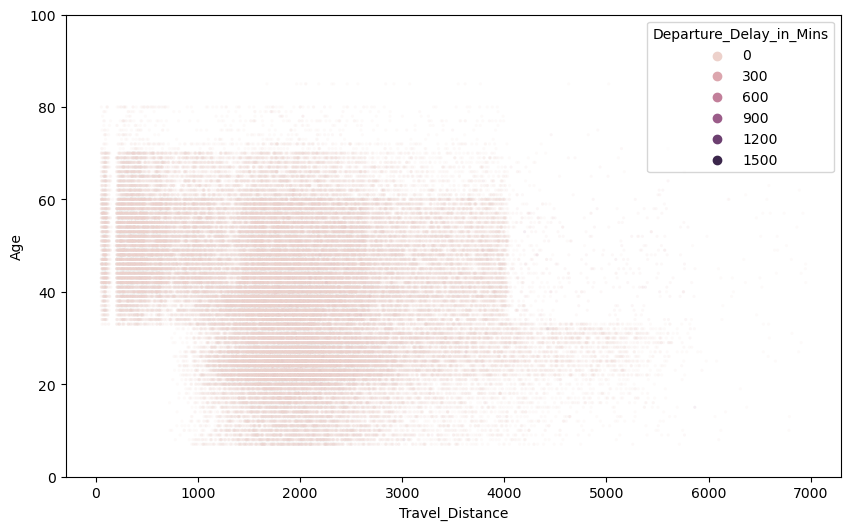

In [14]:
plt.figure(figsize=(10, 6)) 

ax1 = sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Age', 
                hue = 'Departure_Delay_in_Mins',
                alpha = 0.1,
                s=5
               )
'''ax2= sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                #hue = 'Departure_Delay_in_Mins',
                alpha = 0.1,
                s=5,
                ax = ax1
               )'''
#plt.axhline(130)
plt.ylim(0,100)

(0.0, 500.0)

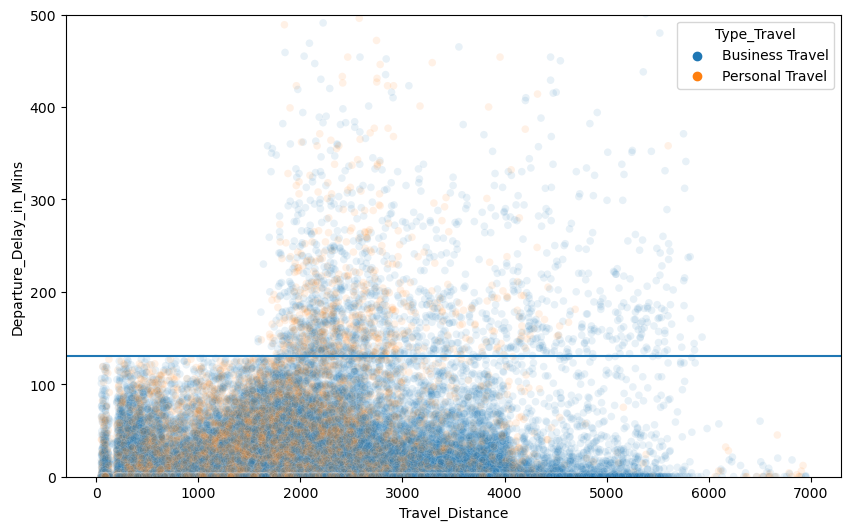

In [15]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data = df,
                x = 'Travel_Distance', 
                y = 'Departure_Delay_in_Mins', 
                hue = 'Type_Travel',
                alpha = 0.1,
                s=30
               )
plt.axhline(130)
plt.ylim(0,500)

(0.0, 7000.0)

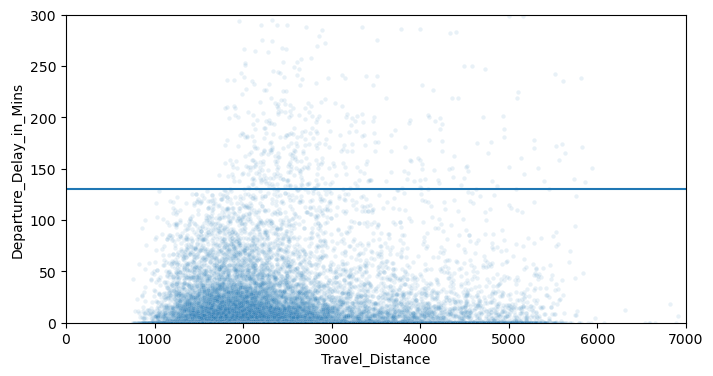

In [16]:
plt.figure(figsize=(8, 4)) 

sns.scatterplot(data = df,
                x = df['Travel_Distance'][(df['Age']>18) & (df['Age']<33)], 
                y = df['Departure_Delay_in_Mins'][(df['Age']>18) & (df['Age']<33)], 
                #hue = (df['Age']>18) & (df['Age']<33),
                alpha = 0.1,
                s=10
               )
plt.axhline(130)
plt.ylim(0,300)
plt.xlim(0,7000)

In [17]:
(df['Type_Travel'])

0        Business Travel
1        Personal Travel
2        Business Travel
3        Business Travel
4        Business Travel
              ...       
94374    Business Travel
94375    Business Travel
94376    Business Travel
94377    Personal Travel
94378    Business Travel
Name: Type_Travel, Length: 94379, dtype: object

# most right: age >=42: got capped

(0.0, 7000.0)

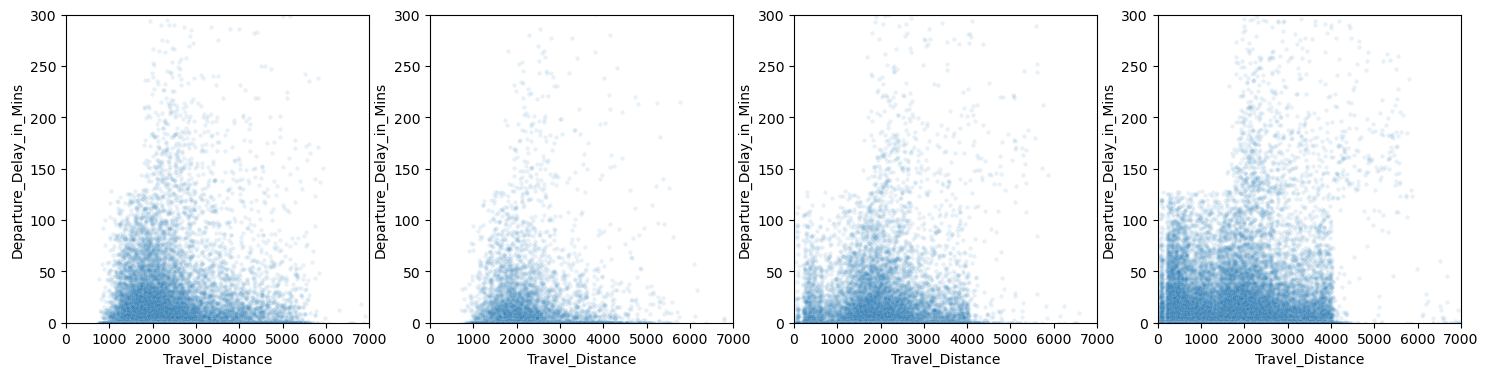

In [18]:
fig = plt.figure(figsize=(18,4))  
ax1 = fig.add_subplot(141)   
ax2 = fig.add_subplot(142) 
ax3 = fig.add_subplot(143) 
ax4 = fig.add_subplot(144) 

sns.scatterplot(data = df,
                x = df['Travel_Distance'][(df['Age']>18) & (df['Age']<33)], 
                y = df['Departure_Delay_in_Mins'][(df['Age']>18) & (df['Age']<33)], 
                #hue = (df['Age']>18) & (df['Age']<33),
                alpha = 0.1,
                s=10,
                ax = ax1
               )
#ax1.axhline(130)
ax1.set_ylim(0,300)
ax1.set_xlim(0,7000)

ax2 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][(df['Age']<=18)], 
                y = df['Departure_Delay_in_Mins'][(df['Age']<=18)], 
                #hue = (df['Age']>18) & (df['Age']<33),
                alpha = 0.1,
                s=10,
                ax = ax2
               )
#ax2.axhline(130)
ax2.set_ylim(0,300)
ax2.set_xlim(0,7000)

where3 = (df['Age']>=33)&  (df['Age']<42)
ax3 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where3], 
                y = df['Departure_Delay_in_Mins'][where3], 
                alpha = 0.1,
                s=10,
                ax = ax3
               )
#ax3.axhline(130)
ax3.set_ylim(0,300)
ax3.set_xlim(0,7000)

where4 = (df['Age']>=42)
ax4 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where4], 
                y = df['Departure_Delay_in_Mins'][where4], 
                alpha = 0.1,
                s=10,
                ax = ax4
               )
#ax4.axhline(130)
ax4.set_ylim(0,300)
ax4.set_xlim(0,7000)

# <33

(0.0, 7000.0)

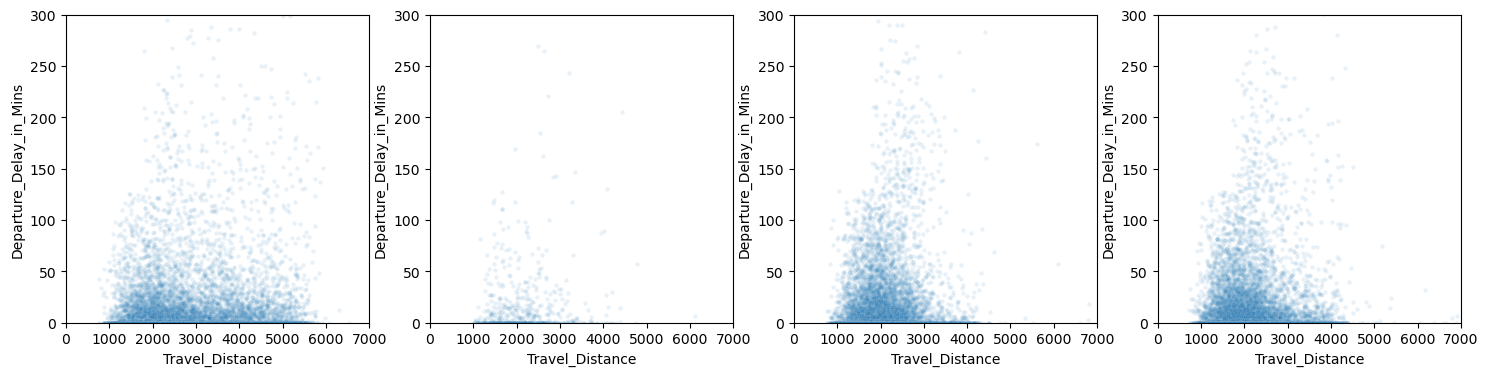

In [20]:
fig = plt.figure(figsize=(18,4))  
ax1 = fig.add_subplot(141)   
ax2 = fig.add_subplot(142) 
ax3 = fig.add_subplot(143) 
ax4 = fig.add_subplot(144) 


where1 = (df['Age']<33) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Business Travel')
ax1 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where1], 
                y = df['Departure_Delay_in_Mins'][where1], 
                alpha = 0.1,
                s=10,
                ax = ax1
               )
#ax1.axhline(130)
ax1.set_ylim(0,300)
ax1.set_xlim(0,7000)

where2 =  (df['Age']<33) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Personal Travel')
ax2 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where2], 
                y = df['Departure_Delay_in_Mins'][where2], 
                alpha = 0.1,
                s=10,
                ax = ax2
               )
#ax2.axhline(130)
ax2.set_ylim(0,300)
ax2.set_xlim(0,7000)


where3 =  (df['Age']<33) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Business Travel')
ax3 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where3], 
                y = df['Departure_Delay_in_Mins'][where3], 
                alpha = 0.1,
                s=10,
                ax = ax3
               )
#ax3.axhline(130)
ax3.set_ylim(0,300)
ax3.set_xlim(0,7000)


where4 =  (df['Age']<33) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Personal Travel')
ax4 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where4], 
                y = df['Departure_Delay_in_Mins'][where4], 
                alpha = 0.1,
                s=10,
                ax = ax4
               )
#ax4.axhline(130)
ax4.set_ylim(0,300)
ax4.set_xlim(0,7000)


# 33-42

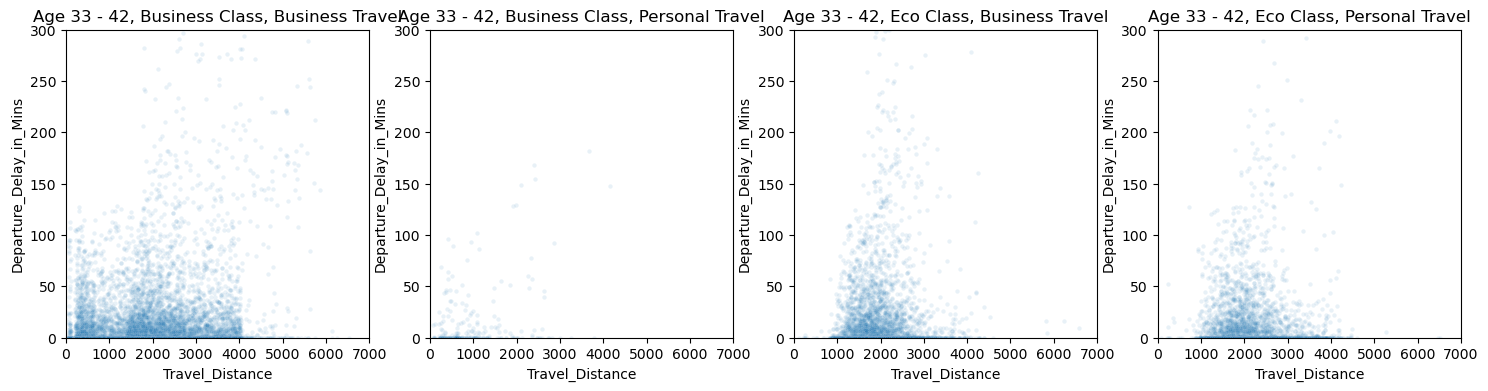

In [21]:
fig = plt.figure(figsize=(18,4))  
ax1 = fig.add_subplot(141)   
ax2 = fig.add_subplot(142) 
ax3 = fig.add_subplot(143) 
ax4 = fig.add_subplot(144) 


where1 = (df['Age']>=33) & (df['Age']<42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Business Travel')
ax1 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where1], 
                y = df['Departure_Delay_in_Mins'][where1], 
                alpha = 0.1,
                s=10,
                ax = ax1
               )
#ax1.axhline(130)
ax1.set_ylim(0,300)
ax1.set_xlim(0,7000)
ax1.title.set_text('Age 33 - 42, Business Class, Business Travel')

where2 = (df['Age']>=33)  & (df['Age']<42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Personal Travel')
ax2 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where2], 
                y = df['Departure_Delay_in_Mins'][where2], 
                alpha = 0.1,
                s=10,
                ax = ax2
               )
#ax2.axhline(130)
ax2.set_ylim(0,300)
ax2.set_xlim(0,7000)
ax2.title.set_text('Age 33 - 42, Business Class, Personal Travel')


where3 = (df['Age']>=33) & (df['Age']<42) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Business Travel')
ax3 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where3], 
                y = df['Departure_Delay_in_Mins'][where3], 
                alpha = 0.1,
                s=10,
                ax = ax3
               )
#ax3.axhline(130)
ax3.set_ylim(0,300)
ax3.set_xlim(0,7000)
ax3.title.set_text('Age 33 - 42, Eco Class, Business Travel')


where4 = (df['Age']>=33) & (df['Age']<42) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Personal Travel')
ax4 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where4], 
                y = df['Departure_Delay_in_Mins'][where4], 
                alpha = 0.1,
                s=10,
                ax = ax4
               )
#ax4.axhline(130)
ax4.set_ylim(0,300)
ax4.set_xlim(0,7000)
ax4.title.set_text('Age 33 - 42, Eco Class, Personal Travel')


# Age >=42

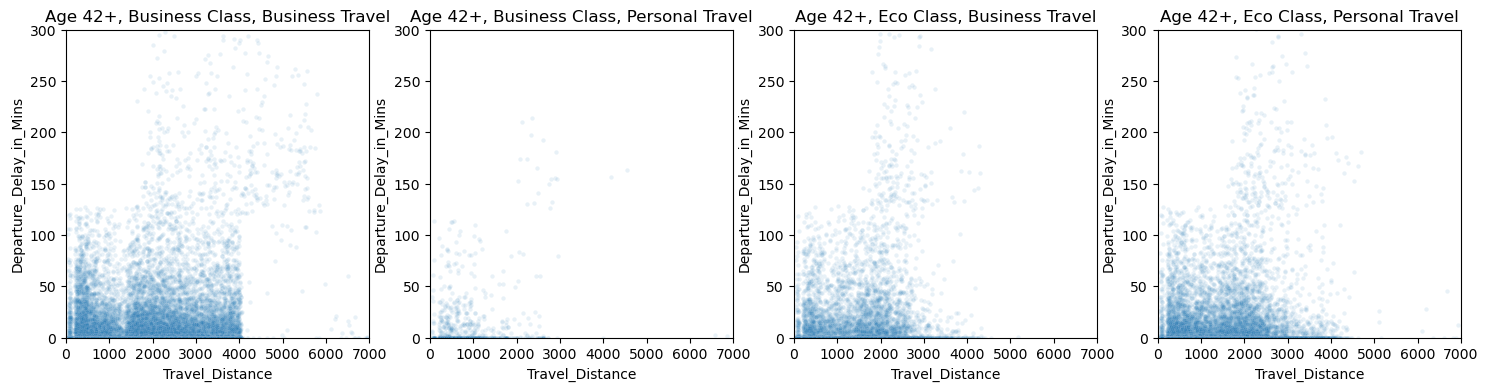

In [22]:
fig = plt.figure(figsize=(18,4))  
ax1 = fig.add_subplot(141)   
ax2 = fig.add_subplot(142) 
ax3 = fig.add_subplot(143) 
ax4 = fig.add_subplot(144) 


where1 = (df['Age']>=42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Business Travel')
ax1 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where1], 
                y = df['Departure_Delay_in_Mins'][where1], 
                alpha = 0.1,
                s=10,
                ax = ax1
               )
#ax1.axhline(130)
ax1.set_ylim(0,300)
ax1.set_xlim(0,7000)
ax1.title.set_text('Age 42+, Business Class, Business Travel')

where2 = (df['Age']>=42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Personal Travel')
ax2 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where2], 
                y = df['Departure_Delay_in_Mins'][where2], 
                alpha = 0.1,
                s=10,
                ax = ax2
               )
#ax2.axhline(130)
ax2.set_ylim(0,300)
ax2.set_xlim(0,7000)
ax2.title.set_text('Age 42+, Business Class, Personal Travel')


where3 = (df['Age']>=42)  & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Business Travel')
ax3 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where3], 
                y = df['Departure_Delay_in_Mins'][where3], 
                alpha = 0.1,
                s=10,
                ax = ax3
               )
#ax3.axhline(130)
ax3.set_ylim(0,300)
ax3.set_xlim(0,7000)
ax3.title.set_text('Age 42+, Eco Class, Business Travel')


where4 = (df['Age']>=42) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Personal Travel')
ax4 = sns.scatterplot(data = df,
                x = df['Travel_Distance'][where4], 
                y = df['Departure_Delay_in_Mins'][where4], 
                alpha = 0.1,
                s=10,
                ax = ax4
               )
#ax4.axhline(130)
ax4.set_ylim(0,300)
ax4.set_xlim(0,7000)
ax4.title.set_text('Age 42+, Eco Class, Personal Travel')
